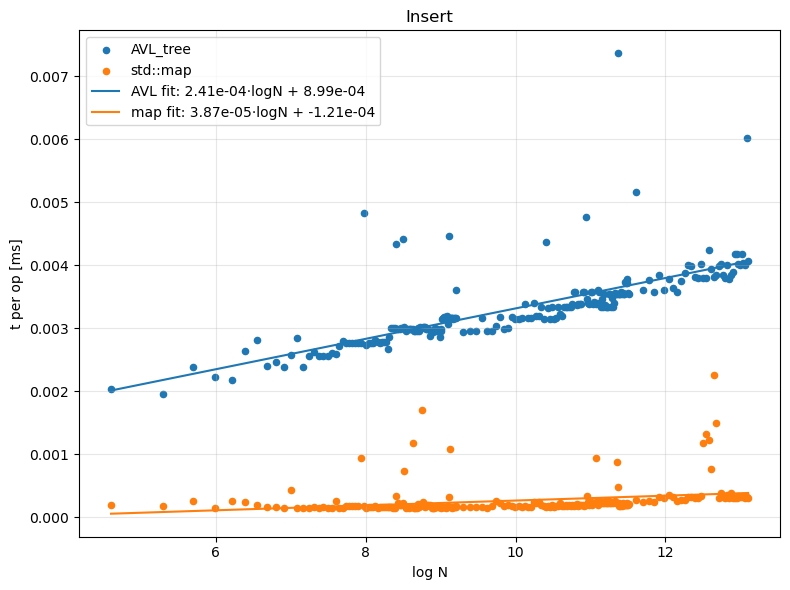

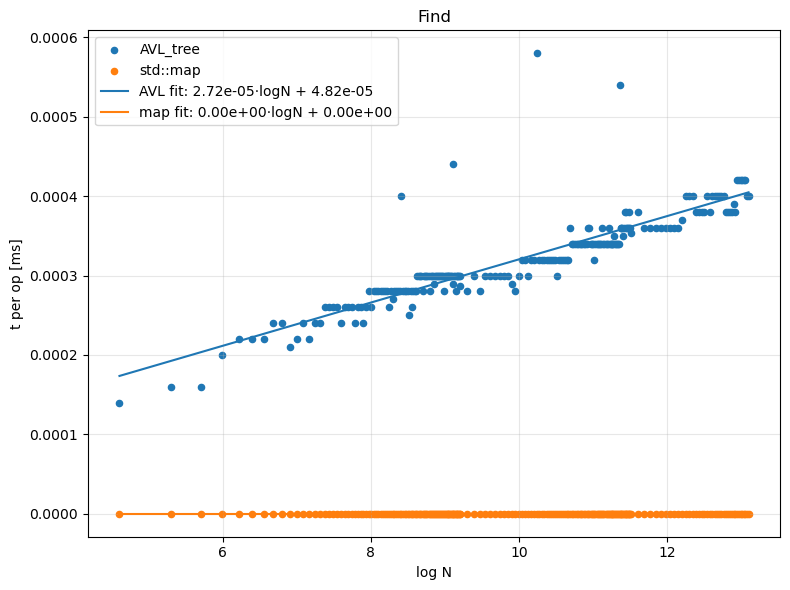

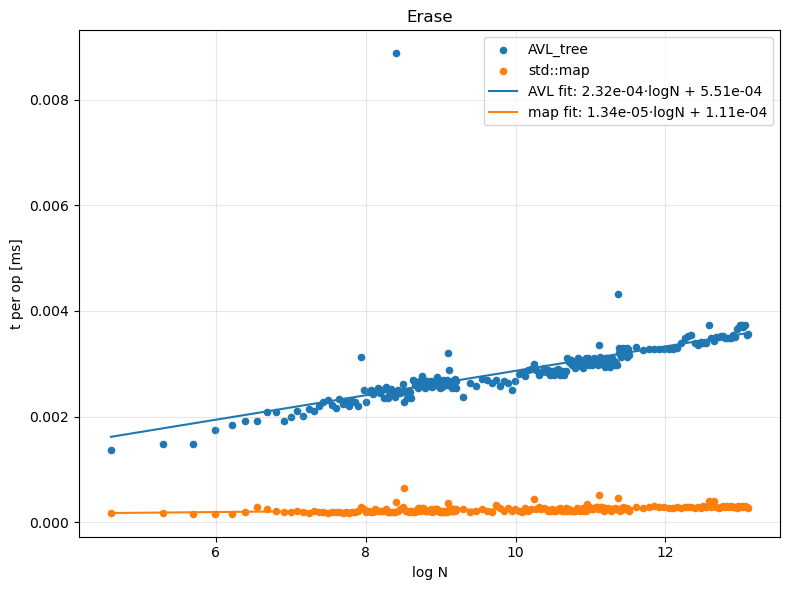

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV = "results.csv"
BASE = np.e  # логарифм по e (натуральный)

def fit_line(x, y):
    """simple linear regression y = a*x + b"""
    A = np.vstack([x, np.ones_like(x)]).T
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return a, b

def plot_compare(df, avl_col, map_col, label):
    # делим время на batch -> мс на одну операцию
    df["avl_ms"] = (df[avl_col] / df["batch"]) / 1000.0
    df["map_ms"] = (df[map_col] / df["batch"]) / 1000.0

    g_avl = df.groupby("N")["avl_ms"].mean()
    g_map = df.groupby("N")["map_ms"].mean()

    N = g_avl.index.values.astype(float)
    x = np.log(N) / np.log(BASE)

    y_avl = g_avl.values
    y_map = g_map.values

    # фитируем прямую
    a1, b1 = fit_line(x, y_avl)
    a2, b2 = fit_line(x, y_map)

    xx = np.linspace(x.min(), x.max(), 200)
    yy1 = a1 * xx + b1
    yy2 = a2 * xx + b2

    plt.figure(figsize=(8,6))
    plt.scatter(x, y_avl, s=20, label="AVL_tree")
    plt.scatter(x, y_map, s=20, label="std::map")
    plt.plot(xx, yy1, label=f"AVL fit: {a1:.2e}·logN + {b1:.2e}")
    plt.plot(xx, yy2, label=f"map fit: {a2:.2e}·logN + {b2:.2e}")
    plt.xlabel("log N")
    plt.ylabel("t per op [ms]")
    plt.title(label)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

df = pd.read_csv(CSV)

plot_compare(df, "avl_insert_us", "map_insert_us", "Insert")
plot_compare(df, "avl_find_us",   "map_find_us",   "Find")
plot_compare(df, "avl_erase_us",  "map_erase_us",  "Erase")
